In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # generating plot

import tensorflow as tf # modeling/training
import time # Used for epoch timing



In [6]:
emissions = pd.read_csv('Food Share Emissions.csv')
emissions.head()

,Entity,Code,Year,Food's share of total emissions (incl. LULUFC)
0,Afghanistan,AFG,1990,78.558522
1,Afghanistan,AFG,1991,79.335651
2,Afghanistan,AFG,1992,84.268804
3,Afghanistan,AFG,1993,85.247941
4,Afghanistan,AFG,1994,86.897834


<AxesSubplot: xlabel='Year'>

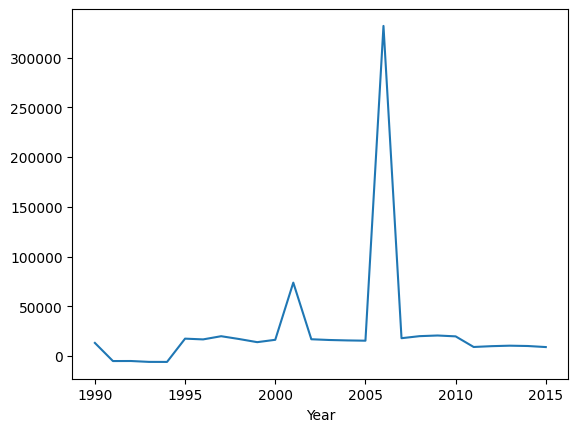

In [28]:
years = emissions
years = years.groupby('Year').sum("Food's share of total emissions (incl. LULUFC)")
years = years.rename(columns={"Food's share of total emissions (incl. LULUFC)": "Emissions"})
years = years.sort_values('Year', ascending=False)
years.Emissions.plot(x="Year", y="Emissions")

<AxesSubplot: xlabel='Entity'>

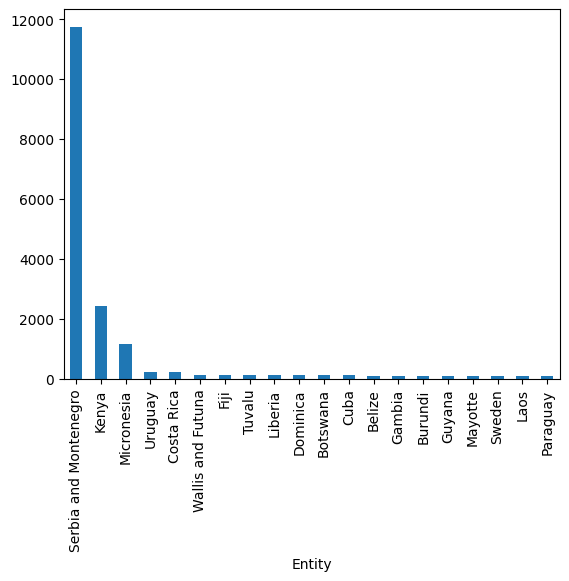

In [29]:
years = emissions
years = years.groupby('Entity').mean("Food's share of total emissions (incl. LULUFC)")
years = years.rename(columns={"Food's share of total emissions (incl. LULUFC)": "Emissions"})
years = years.sort_values('Emissions', ascending=False)
years.Emissions.head(20).plot(x="Entity", y="Emissions", kind='bar')


<AxesSubplot: xlabel='Entity'>

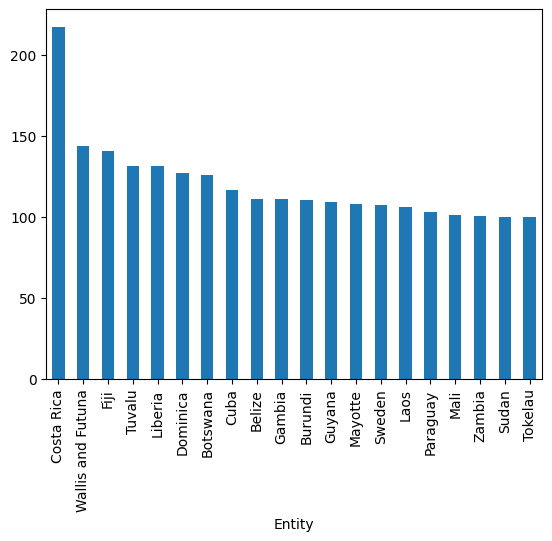

In [31]:
years= years.iloc[3: , :]
years.Emissions.head(20).plot(x="Entity", y="Emissions", kind='bar')

<AxesSubplot: xlabel='Entity'>

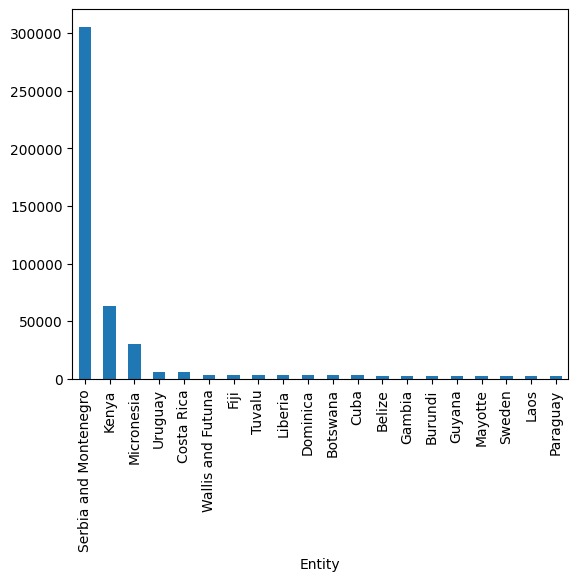

In [32]:
years = emissions
years = years.groupby('Entity').sum("Food's share of total emissions (incl. LULUFC)")
years = years.rename(columns={"Food's share of total emissions (incl. LULUFC)": "Emissions"})
years = years.sort_values('Emissions', ascending=False)
years.Emissions.head(20).plot(x="Entity", y="Emissions", kind='bar')

In [50]:
import csv
from collections import defaultdict

# Dictionary to store the sum and count of values for each country
country_data = defaultdict(lambda: {'sum': 0, 'count': 0})

# Read the CSV file and update the country_data dictionary
with open('Food Share Emissions.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)
   
    # Iterate through the data and calculate sums and counts for each country
    for row in data[1:]:
        
        country, code, year, value = row
        country_data[country]['sum'] += float(value)
        country_data[country]['count'] += 1

# Iterate through the data again to fix the outlier
for i, row in enumerate(data):
    country, code, year, value = row
    if year == '2006':
        # Calculate the average for the country based on previous years
        avg_value = country_data[country]['sum'] / country_data[country]['count']
        data[i] = [country, code, year, str(float(avg_value))]

# Write the updated data to a new CSV file
with open('fixed_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

Afghanistan
Albania
Algeria
American Samoa
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Falkland Islands
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzst